In [6]:
#import nessary  modules for data  processing
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np

#import matplotlib.pyplot for plotting graph
import matplotlib.pyplot as plt    
import seaborn as sns  

#importing the model that manage date and time
import datetime as dt

In [7]:
#Get the dataset from file
file_Nyayo = r"C:\Users\HP\OneDrive\school\OneDrive\Documents\GitHub\Dataset-\DATA\Nyayo Embakasi.csv"
file_Nakuru = r"C:\Users\HP\OneDrive\school\OneDrive\Documents\GitHub\Dataset-\DATA\Nakuru.csv"
file_Obestered = r"C:\Users\HP\OneDrive\school\OneDrive\Documents\GitHub\Dataset-\DATA\Obesterd.csv"
#Load the data
df_Nyayo = pd.read_csv(file_Nyayo)
df_Nakuru = pd.read_csv(file_Nakuru)
df_obestered = pd.read_csv(file_Obestered)




In [8]:
#Combine the data
df_combined = pd.concat([df_Nyayo,df_Nakuru,df_obestered])
df_combined




,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2388059,"Nyayo Embakasi, Nairobi",temperature,28.0,c,2024-02-06T05:00:00+00:00,2024-02-06T08:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,NaN,NaN,NaN,AirGradient,AirGradient
1,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T06:00:00+00:00,2024-02-06T09:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,NaN,NaN,NaN,AirGradient,AirGradient
2,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T07:00:00+00:00,2024-02-06T10:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,NaN,NaN,NaN,AirGradient,AirGradient
3,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T08:00:00+00:00,2024-02-06T11:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,NaN,NaN,NaN,AirGradient,AirGradient
4,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T10:00:00+00:00,2024-02-06T13:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,NaN,NaN,NaN,AirGradient,AirGradient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,1235982,Hauptstraße Oberstedten,pm25,8.0,µg/m³,2023-08-30T22:00:00+00:00,2023-08-31T00:00:00+02:00,Europe/Berlin,50.226631,8.564387,NaN,NaN,NaN,Unknown Governmental Organization,AirGradient
2822,1235982,Hauptstraße Oberstedten,pm25,8.0,µg/m³,2023-08-30T23:00:00+00:00,2023-08-31T01:00:00+02:00,Europe/Berlin,50.226631,8.564387,NaN,NaN,NaN,Unknown Governmental Organization,AirGradient
2823,1235982,Hauptstraße Oberstedten,pm25,8.5,µg/m³,2023-08-31T00:00:00+00:00,2023-08-31T02:00:00+02:00,Europe/Berlin,50.226631,8.564387,NaN,NaN,NaN,Unknown Governmental Organization,AirGradient
2824,1235982,Hauptstraße Oberstedten,pm25,8.2,µg/m³,2023-08-31T01:00:00+00:00,2023-08-31T03:00:00+02:00,Europe/Berlin,50.226631,8.564387,NaN,NaN,NaN,Unknown Governmental Organization,AirGradient


In [9]:
def fix_null_values(combined_df, location_name):
    if location_name == 'Nyayo Embakasi, Nairobi':
        combined_df.loc[combined_df['location_name'] == location_name, 'country_iso'] = 'KE'
    elif location_name == 'Malkia, Nakuru (DBUSY3473 → ATQJXRNT)':
        combined_df.loc[combined_df['location_name'] == location_name, 'country_iso'] = 'KE'
    elif location_name == 'Hauptstraße Oberstedten':
        combined_df.loc[combined_df['location_name'] == location_name, 'country_iso'] = 'DE'
    return combined_df

# fix null values 
df_combined = fix_null_values(df_combined, 'Nyayo Embakasi, Nairobi')
df_combined = fix_null_values(df_combined, 'Malkia, Nakuru (DBUSY3473 → ATQJXRNT)')
df_combined = fix_null_values(df_combined, 'Hauptstraße Oberstedten')

df_combined.to_csv('df_combined.csv', index=False)
df_combined.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_15932\114378134.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'KE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df.loc[combined_df['location_name'] == location_name, 'country_iso'] = 'KE'


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2388059,"Nyayo Embakasi, Nairobi",temperature,28.0,c,2024-02-06T05:00:00+00:00,2024-02-06T08:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,NaN,NaN,AirGradient,AirGradient
1,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T06:00:00+00:00,2024-02-06T09:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,NaN,NaN,AirGradient,AirGradient
2,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T07:00:00+00:00,2024-02-06T10:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,NaN,NaN,AirGradient,AirGradient
3,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T08:00:00+00:00,2024-02-06T11:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,NaN,NaN,AirGradient,AirGradient
4,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T10:00:00+00:00,2024-02-06T13:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,NaN,NaN,AirGradient,AirGradient


In [10]:
#fix the null values at ismobile column
def fix_null_values(combined_df, location_name):
    if location_name == 'Nyayo Embakasi, Nairobi':
        combined_df.loc[combined_df['location_name'] == location_name, 'isMobile'] = 'False'
    elif location_name == 'Malkia, Nakuru (DBUSY3473 → ATQJXRNT)':
        combined_df.loc[combined_df['location_name'] == location_name, 'isMobile'] = 'flase'
    elif location_name == 'Hauptstraße Oberstedten':
        combined_df.loc[combined_df['location_name'] == location_name, 'isMobile'] = 'false'
    return combined_df

# fix the null values
df_combined = fix_null_values(df_combined, 'Nyayo Embakasi, Nairobi')
df_combined = fix_null_values(df_combined, 'Malkia, Nakuru (DBUSY3473 → ATQJXRNT)')
df_combined = fix_null_values(df_combined, 'Hauptstraße Oberstedten')

df_combined.to_csv('df_combined.csv', index=False)
df_combined.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15932\3778600201.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df.loc[combined_df['location_name'] == location_name, 'isMobile'] = 'False'


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2388059,"Nyayo Embakasi, Nairobi",temperature,28.0,c,2024-02-06T05:00:00+00:00,2024-02-06T08:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,NaN,AirGradient,AirGradient
1,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T06:00:00+00:00,2024-02-06T09:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,NaN,AirGradient,AirGradient
2,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T07:00:00+00:00,2024-02-06T10:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,NaN,AirGradient,AirGradient
3,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T08:00:00+00:00,2024-02-06T11:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,NaN,AirGradient,AirGradient
4,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T10:00:00+00:00,2024-02-06T13:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,NaN,AirGradient,AirGradient


In [11]:
#Fix the null values at isMonitor
def fix_null_values(combined_df, location_name):
    if location_name == 'Nyayo Embakasi, Nairobi':
        combined_df.loc[combined_df['location_name'] == location_name, 'isMonitor'] = 'True'
    elif location_name == 'Malkia, Nakuru (DBUSY3473 → ATQJXRNT)':
        combined_df.loc[combined_df['location_name'] == location_name, 'isMonitor'] = 'True'
    elif location_name == 'Hauptstraße Oberstedten':
        combined_df.loc[combined_df['location_name'] == location_name, 'isMonitor'] = 'True'
    return combined_df

# fix the null values
df_combined = fix_null_values(df_combined, 'Nyayo Embakasi, Nairobi')
df_combined = fix_null_values(df_combined, 'Malkia, Nakuru (DBUSY3473 → ATQJXRNT)')
df_combined = fix_null_values(df_combined, 'Hauptstraße Oberstedten')

df_combined.to_csv('df_combined.csv', index=False)
df_combined.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_15932\3445855572.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df.loc[combined_df['location_name'] == location_name, 'isMonitor'] = 'True'


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2388059,"Nyayo Embakasi, Nairobi",temperature,28.0,c,2024-02-06T05:00:00+00:00,2024-02-06T08:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,True,AirGradient,AirGradient
1,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T06:00:00+00:00,2024-02-06T09:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,True,AirGradient,AirGradient
2,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T07:00:00+00:00,2024-02-06T10:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,True,AirGradient,AirGradient
3,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T08:00:00+00:00,2024-02-06T11:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,True,AirGradient,AirGradient
4,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T10:00:00+00:00,2024-02-06T13:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KE,False,True,AirGradient,AirGradient


In [12]:
#this function filters the dataframe by parameter value
def filter_parameters(df, location_name, parameter_value):
    filtered_With_parameter = df[df['parameter'] == parameter_value]
    filter_location = df[df['location_name'] == location_name]
    filtered_df = filter_location.merge(filtered_With_parameter, on = ['location_name','parameter'])
    return filtered_df

# Function to analyze temperature data
def analyze_temperature_data(data_frame):
    highest_temperature = max(data_frame["value_x"])
    lowest_temperature = min(data_frame["value_x"])
    average_temperature = round(sum(data_frame["value_x"]) / len(data_frame["value_x"]), 2)
    standard_deviation = round(np.std(data_frame["value_x"]), 2)
    
    analysis_results = {
        "Lowest Recorded Temperature": f"{lowest_temperature} °C",
        "Highest Recorded Temperature": f"{highest_temperature} °C",
        "Average Temperature": f"{average_temperature} °C",
        "Standard Deviation": f"{standard_deviation} °C"
    }
    
    return analysis_results


# Run the cell below to load the data and filter by parameter value
Nyayo_Temp_ANSYS = filter_parameters(df_combined,"Nyayo Embakasi, Nairobi",'temperature')
Nakuru_Temp_ANSYS = filter_parameters(df_combined,"Malkia, Nakuru (DBUSY3473 → ATQJXRNT)",'temperature')
Hauptstraße_Temp_ANSYS = filter_parameters(df_combined,"Hauptstraße Oberstedten",'temperature')

# see  the head of the filted data
Hauptstraße_Temp_ANSYS.head()




,location_id_x,location_name,parameter,value_x,unit_x,datetimeUtc_x,datetimeLocal_x,timezone_x,latitude_x,longitude_x,...,datetimeUtc_y,datetimeLocal_y,timezone_y,latitude_y,longitude_y,country_iso_y,isMobile_y,isMonitor_y,owner_name_y,provider_y
0,1235982,Hauptstraße Oberstedten,temperature,26.0,c,2023-07-15T13:00:00+00:00,2023-07-15T15:00:00+02:00,Europe/Berlin,50.226631,8.564387,...,2023-07-15T13:00:00+00:00,2023-07-15T15:00:00+02:00,Europe/Berlin,50.226631,8.564387,DE,false,True,Unknown Governmental Organization,AirGradient
1,1235982,Hauptstraße Oberstedten,temperature,26.0,c,2023-07-15T13:00:00+00:00,2023-07-15T15:00:00+02:00,Europe/Berlin,50.226631,8.564387,...,2023-07-15T14:00:00+00:00,2023-07-15T16:00:00+02:00,Europe/Berlin,50.226631,8.564387,DE,false,True,Unknown Governmental Organization,AirGradient
2,1235982,Hauptstraße Oberstedten,temperature,26.0,c,2023-07-15T13:00:00+00:00,2023-07-15T15:00:00+02:00,Europe/Berlin,50.226631,8.564387,...,2023-07-15T15:00:00+00:00,2023-07-15T17:00:00+02:00,Europe/Berlin,50.226631,8.564387,DE,false,True,Unknown Governmental Organization,AirGradient
3,1235982,Hauptstraße Oberstedten,temperature,26.0,c,2023-07-15T13:00:00+00:00,2023-07-15T15:00:00+02:00,Europe/Berlin,50.226631,8.564387,...,2023-07-15T16:00:00+00:00,2023-07-15T18:00:00+02:00,Europe/Berlin,50.226631,8.564387,DE,false,True,Unknown Governmental Organization,AirGradient
4,1235982,Hauptstraße Oberstedten,temperature,26.0,c,2023-07-15T13:00:00+00:00,2023-07-15T15:00:00+02:00,Europe/Berlin,50.226631,8.564387,...,2023-07-15T17:00:00+00:00,2023-07-15T19:00:00+02:00,Europe/Berlin,50.226631,8.564387,DE,false,True,Unknown Governmental Organization,AirGradient


In [13]:
Dict = {
    "Nyayo_Temp": analyze_temperature_data(Nyayo_Temp_ANSYS),
    "Nakuru_Temp": analyze_temperature_data(Nakuru_Temp_ANSYS),
    "Hauptstraße_Temp" : analyze_temperature_data(Hauptstraße_Temp_ANSYS)
}

Temp_Table = pd.DataFrame.from_dict(Dict ,orient='index' )
Temp_Table.index.name = 'Location'
Temp_Table.reset_index(inplace=True)
Temp_Table








,Location,Lowest Recorded Temperature,Highest Recorded Temperature,Average Temperature,Standard Deviation
0,Nyayo_Temp,24.0 °C,30.0 °C,27.62 °C,0.77 °C
1,Nakuru_Temp,10.0 °C,31.0 °C,20.28 °C,4.15 °C
2,Hauptstraße_Temp,12.0 °C,34.0 °C,20.0 °C,3.66 °C


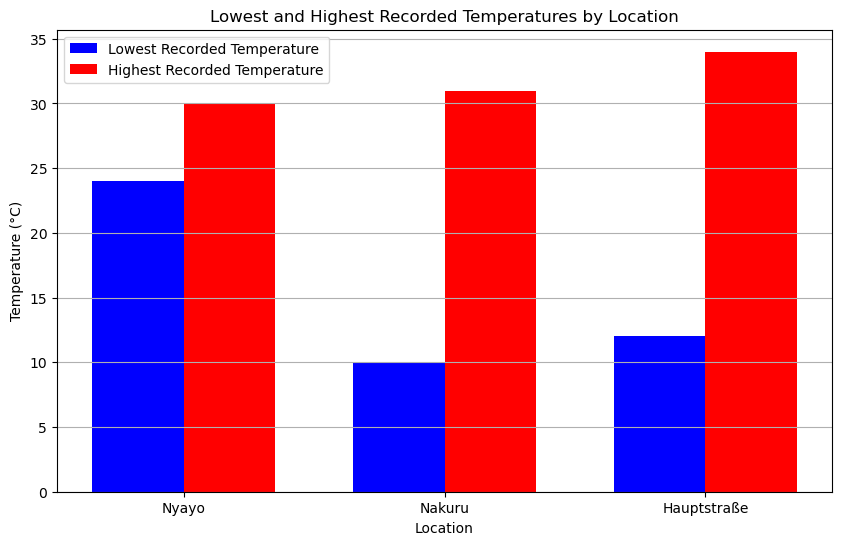

In [14]:


# Visulazing the data
locations = ["Nyayo", "Nakuru", "Hauptstraße"]
lowest_temperatures = [24.0, 10.0, 12.0]
highest_temperatures = [30.0, 31.0, 34.0]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the x-axis
x = np.arange(len(locations))

# Create the bar plots side by side
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, lowest_temperatures, bar_width, color='b', label='Lowest Recorded Temperature')
plt.bar(x + bar_width/2, highest_temperatures, bar_width, color='r', label='Highest Recorded Temperature')
plt.xlabel('Location')
plt.ylabel('Temperature (°C)')
plt.title('Lowest and Highest Recorded Temperatures by Location')
plt.xticks(x, locations)
plt.legend()
plt.grid(axis='y')
plt.show()







Lowest Recorded Temperature: 24.0 °C
Highest Recorded Temperature: 30.0 °C
Average Temperature: 27.62 °C
starndand deviation: 0.77 °C


(array([   652.,      0.,   1304.,      0.,  20864.,      0., 158436.,
             0., 201468.,      0.,  40424.,   1956.]),
 array([24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. ,
        29.5, 30. ]),
 <BarContainer object of 12 artists>)

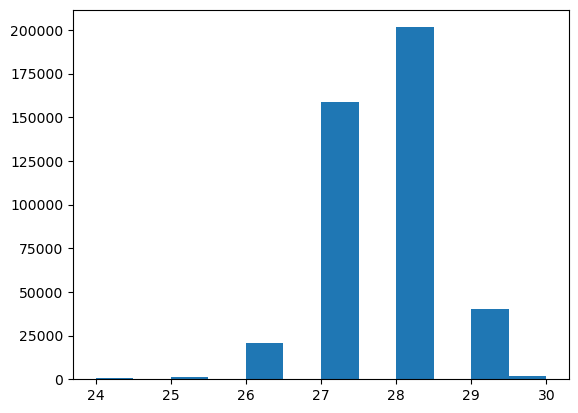

In [28]:
#get the highest and lowest temperatures recorded in a given period
highest_temperature = max(Nyayo_Temp_ANSYS["value_x"])
lowest_temperature = min(Nyayo_Temp_ANSYS["value_x"])

print(f'Lowest Recorded Temperature: {lowest_temperature} °C')
print(f'Highest Recorded Temperature: {highest_temperature} °C')

print(f'Average Temperature: {round(sum(Nyayo_Temp_ANSYS["value_x"])/len(Nyayo_Temp_ANSYS["value_x"]), 2)} °C')
print(f'starndand deviation: {round(np.std(Nyayo_Temp_ANSYS["value_x"]), 2)} °C')

#plot a histogram of the temperature data
plt.hist(Nyayo_Temp_ANSYS["value_x"], bins=12)

#plot a graph of the temperature data aganist the time
